# 감정분석 모델 생성

#### 라이브러리 불러오기

In [177]:
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

# Step 1. 데이터 수집
## 1-1. csv파일로 데이터 불러오기

In [ ]:
df = pd.read_csv('emotiondata.csv', encoding='cp949')

print(df)

                                                   사람문장1 감정_대분류 감정_소분류
0                              일은 왜 해도 해도 끝이 없을까? 화가 난다.     분노  노여워하는
1         이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.     분노  노여워하는
2      회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...     분노  노여워하는
3      직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...     분노  노여워하는
4                  얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.     분노  노여워하는
...                                                  ...    ...    ...
51625     나이가 먹고 이제 돈도 못 벌어 오니까 어떻게 살아가야 할지 막막해. 능력도 없고.     분노    성가신
51626        몸이 많이 약해졌나 봐. 이제 전과 같이 일하지 못할 것 같아 너무 짜증 나.     불안    초조한
51627   이제 어떻게 해야 할지 모르겠어. 남편도 그렇고 노후 준비도 안 되어서 미래가 걱정돼.     상처    희생된
51628  몇십 년을 함께 살았던 남편과 이혼했어. 그동안의 세월에 배신감을 느끼고 너무 화가 나.     불안  걱정스러운
51629  남편과 결혼한 지 사십 년이야. 이제 사람 만나는 것도 버겁고 알던 사람도 점점 사라져.     상처   배신당한

[51630 rows x 3 columns]


## 1-2. 리스트에 문장과 감정 넣어주기

In [ ]:
all_data = []
all_target = []

for q,  label in zip(df['사람문장1'], df['감정_대분류']):
    all_data.append(q)
    all_target.append(label)

In [ ]:
print(all_data[0])
print(all_target[0])
print(set(all_target))
print(type(all_target[0]))

일은 왜 해도 해도 끝이 없을까? 화가 난다.
분노
{'상처', '분노', '기쁨', '슬픔', '불안', '당황'}
<class 'str'>


## 1-3. 상처/슬픔 -> 0, 분노 -> 1, 불안/당황 -> 2, 기쁨 -> 3 으로 매핑해주기

In [ ]:
# 각 감정을 숫자로 매핑하는 딕셔너리
emotion_mapping = {'상처': 0, '슬픔': 0, '분노': 1, '불안': 2, '당황': 2, '기쁨': 3}

# 리스트의 각 원소를 매핑 딕셔너리를 통해 숫자로 변환
all_target_num = [emotion_mapping[emotion] for emotion in all_target]

# 결과 출력
print(all_target_num[:10])
print(all_target[:10])

[1, 1, 1, 1, 1, 1, 1, 3, 2, 3]
['분노', '분노', '분노', '분노', '분노', '분노', '분노', '기쁨', '불안', '기쁨']


In [178]:
from konlpy.tag import Okt  
okt=Okt()  

all_data_tokenized = []

for s in all_data:
    text_2 = [word for word, pos in okt.pos(s) if (pos != 'Punctuation') and (pos != 'Josa')]
    if text_2:  # 빈 리스트가 아닌 경우에만 추가
        all_data_tokenized.append(text_2)

KeyboardInterrupt: 

In [ ]:
print(okt.pos(all_data[0]))
print(all_data[0])
print(all_data_tokenized[0])

[('일', 'Noun'), ('은', 'Josa'), ('왜', 'Noun'), ('해도', 'Noun'), ('해도', 'Noun'), ('끝', 'Noun'), ('이', 'Josa'), ('없을까', 'Adjective'), ('?', 'Punctuation'), ('화가', 'Noun'), ('난다', 'Verb'), ('.', 'Punctuation')]
일은 왜 해도 해도 끝이 없을까? 화가 난다.
['일', '왜', '해도', '해도', '끝', '없을까', '화가', '난다']


In [ ]:
from collections import Counter

# 전체 데이터에 대한 단어 빈도수 계산
word_counts = Counter(word for sentence in all_data_tokenized for word in sentence)

# 빈도수에 따라 단어를 정렬
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 상위 N개의 단어를 선택 (예시에서는 상위 500개로 설정)
top_words = [word for word, count in sorted_words[:500]]

# 상위 N개의 단어로 단어 사전 만들기
word_to_index = {word: idx + 1 for idx, word in enumerate(top_words)}

# 모든 데이터를 숫자로 변환
all_data_indices = [[word_to_index.get(word, 0) for word in sentence] for sentence in all_data_tokenized]

In [ ]:
# 상위 500개의 단어 선택
top_words = [word for word, count in word_counts.most_common(500)]

# 상위 500개의 단어에 대한 빈도수 출력
for word in top_words:
    print(f'{word}: {word_counts[word]}번')

내: 10953번
나: 10553번
너무: 10444번
들: 9048번
친구: 7521번
것: 6894번
못: 4712번
안: 4409번
같아: 4223번
해서: 3136번
사람: 2892번
하는: 2862번
요즘: 2808번
했어: 2586번
할: 2576번
해: 2554번
회사: 2501번
일: 2487번
오늘: 2448번
때문: 2438번
돈: 2395번
말: 2368번
남편: 2367번
잘: 2340번
정말: 2238번
나를: 2225번
아내: 2205번
했는데: 2148번
게: 2085번
부모님: 2069번
걱정: 2041번
생각: 1975번
우리: 1930번
수: 1866번
다: 1807번
때: 1806번
결혼: 1751번
있어: 1716번
이번: 1698번
돼: 1695번
나이: 1687번
없어: 1671번
많이: 1670번
엄마: 1625번
집: 1611번
슬퍼: 1567번
직장: 1550번
이: 1541번
들어: 1533번
적: 1532번
거: 1525번
힘들어: 1510번
하는데: 1488번
이제: 1477번
더: 1472번
하고: 1472번
난: 1434번
가족: 1409번
않아: 1392번
자식: 1367번
한: 1359번
해야: 1349번
마음: 1336번
화가: 1308번
아들: 1291번
스러워: 1282번
봐: 1280번
학교: 1266번
취업: 1245번
기분: 1221번
준비: 1191번
있는데: 1180번
몸: 1178번
공부: 1157번
날: 1140번
자꾸: 1135번
아이: 1125번
있는: 1115번
병원: 1110번
왜: 1099번
건강: 1097번
같아서: 1044번
일이: 1043번
하지: 1037번
혼자: 1028번
없어서: 1006번
전: 1000번
모르겠어: 1000번
지금: 995번
걸: 978번
어떻게: 975번
아빠: 975번
아무: 967번
당황: 941번
성적: 938번
그: 929번
딸: 920번
다른: 890번
불안해: 869번
스트레스: 867번
노후: 840번
짜증: 825번
속상해: 814번

In [ ]:
print(all_data_indices[0:10])
print(all_target_num[0:10])

[[18, 80, 171, 171, 0, 0, 64, 0], [39, 280, 164, 0, 0, 0, 0, 397, 76, 0, 3, 64, 2], [17, 0, 0, 0, 0, 381, 104, 161, 0, 260, 32, 0, 100, 159], [47, 0, 284, 2, 0, 0, 0, 436, 299, 256, 25, 0, 0], [132, 87, 0, 0, 26, 197, 12, 6, 82, 3, 64, 2], [47, 0, 0, 153, 0, 51, 9, 0, 193, 464, 145, 0], [0, 0, 193, 301, 7, 0, 0, 30, 430, 0, 0, 120, 0], [0, 257, 132, 8, 0, 0, 47, 431, 0], [423, 157, 69, 32, 62, 53, 89, 3, 0, 0, 116], [13, 47, 155, 3, 0, 107, 6, 9]]
[1, 1, 1, 1, 1, 1, 1, 3, 2, 3]


In [ ]:
lengths = np.array([len(x) for x in all_data_indices])
print(np.mean(lengths), np.median(lengths))

10.369494479953515 10.0


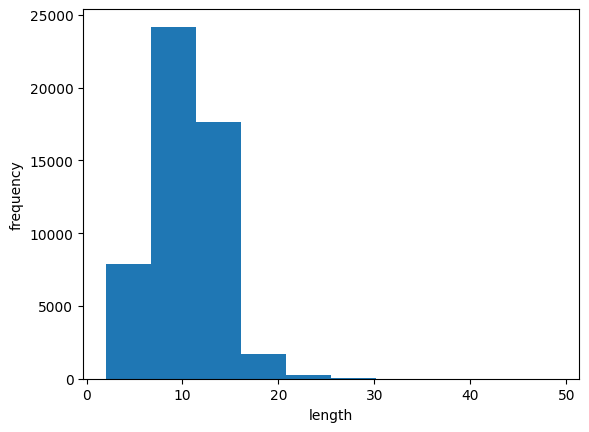

In [ ]:
plt.hist(lengths)
plt.xlabel("length")
plt.ylabel("frequency")
plt.show()

In [ ]:
train_seq = pad_sequences(all_data_indices, maxlen = 10)

print(train_seq.shape)

print(train_seq[0])

print(train_seq[0][-10:])

print(train_seq[5])

(51630, 10)
[  0   0  18  80 171 171   0   0  64   0]
[  0   0  18  80 171 171   0   0  64   0]
[  0 153   0  51   9   0 193 464 145   0]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(train_seq, all_target_num, test_size = 0.2, random_state = 42)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_input[1])

print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

[144   0  16   0  51   0  90   3 140  16]
(33043, 10)
(8261, 10)
(10326, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 라벨 데이터
train_target = np.array(train_target)
val_target = np.array(val_target)

# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=501, output_dim=128, input_length=10))
model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))  # 4는 클래스의 개수에 맞게 설정

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb=keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only=True)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 모델 학습
model.fit(train_input, train_target, epochs=20, batch_size=64, validation_data=(val_input, val_target))



Epoch 1/20


517/517 [==============================] - 13s 16ms/step - loss: 1.0625 - accuracy: 0.5184 - val_loss: 0.9993 - val_accuracy: 0.5539
Epoch 2/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9838 - accuracy: 0.5600 - val_loss: 0.9955 - val_accuracy: 0.5561
Epoch 3/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9735 - accuracy: 0.5661 - val_loss: 0.9981 - val_accuracy: 0.5582
Epoch 4/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9644 - accuracy: 0.5713 - val_loss: 0.9899 - val_accuracy: 0.5533
Epoch 5/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9550 - accuracy: 0.5763 - val_loss: 0.9879 - val_accuracy: 0.5623
Epoch 6/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9470 - accuracy: 0.5824 - val_loss: 0.9923 - val_accuracy: 0.5579
Epoch 7/20
517/517 [==============================] - 7s 13ms/step - loss: 0.9382 - accuracy: 0.5818 - val_loss: 0.9982 - val_accuracy: 0

In [159]:
# 패딩이 완료된 테스트 데이터
test_input = pad_sequences(test_input, maxlen=10)

# 테스트 데이터에 대한 라벨
test_target = np.array(test_target)

loss, accuracy = model.evaluate(test_input, test_target)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

323/323 [==============================] - 1s 3ms/step - loss: 1.2491 - accuracy: 0.5289
Test Loss: 1.2490772008895874
Test Accuracy: 0.5288591980934143


In [189]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 입력 문장
input_sentence = "월급 들어왔다 맛있는거 먹어야지"

# 입력 문장 토큰화 및 패딩
input_tokens = [word for word, pos in okt.pos(input_sentence) if (pos != 'Punctuation') and (pos != 'Josa')]
input_indices = [word_to_index.get(word, 0) for word in input_tokens]
padded_input = pad_sequences([input_indices], maxlen=10)

# 모델 예측
predicted_probabilities = model.predict(padded_input)
predicted_class = np.argmax(predicted_probabilities)

# 예측된 결과 출력
emotions = ['슬픔', '분노', '불안', '기쁨']
predicted_emotion = emotions[predicted_class]

print(f"입력 문장: {input_sentence}")
print(f"예측된 감정: {predicted_emotion}")
print(f"각 클래스의 확률: {predicted_probabilities[0]}")

1/1 [==============================] - 0s 77ms/step
입력 문장: 월급 들어왔다 맛있는거 먹어야지
예측된 감정: 슬픔
각 클래스의 확률: [0.5519657  0.10805776 0.3364304  0.00354612]


In [176]:
from collections import Counter

# train_target에 있는 클래스별 갯수 확인
class_counts = Counter(train_target)

# 결과 출력
print("클래스별 갯수:")
for emotion, count in class_counts.items():
    print(f"{emotion}: {count}개")

클래스별 갯수:
1: 5890개
0: 11614개
3: 3970개
2: 11569개


In [ ]:
train_oh = keras.utils.to_categorical(train_input)

print(train_oh.shape)

print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_input)

print(val_oh.shape)

print(np.sum(val_oh[0][0]))

(33043, 10, 501)
1.0
(8261, 10, 501)
1.0


In [ ]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape = (10, 501)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=10, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])